<a href="https://colab.research.google.com/github/ananyaprabhakarm/Fake-Account-Detection-Model/blob/main/main2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.backend import shape
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.layers import LSTM
import matplotlib.pyplot as plt

import keras
import keras.utils
from keras import utils as np_utils

from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV,KFold, cross_val_predict, StratifiedKFold, train_test_split, learning_curve, ShuffleSplit

from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, average_precision_score, auc

from sklearn.decomposition import PCA

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf


from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
#from keras.utils import np_utils
from tensorflow.python.keras.utils import np_utils
#  ConvLSTM
from keras.layers import Dense, Activation, Input, LSTM, Bidirectional, Dropout
from keras.models import Sequential, Model
from keras.layers import Conv1DTranspose, Conv1D, MaxPooling1D

from tensorflow.python.client import device_lib

In [2]:
!pip install datasets  # Install the datasets library (if not installed)

from datasets import load_dataset
import pandas as pd

# Load the dataset from Hugging Face
dataset = load_dataset("airt-ml/twitter-human-bots")

# Convert to Pandas DataFrame
df = pd.DataFrame(dataset["train"])

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 11.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == 

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/30.0 [00:00<?, ?B/s]

twitter_human_bots_dataset.csv:   0%|          | 0.00/11.8M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/37438 [00:00<?, ? examples/s]

In [3]:
df.shape

(37438, 20)

In [4]:
df.head()

,Unnamed: 0,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,id,lang,location,profile_background_image_url,profile_image_url,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,0,2016-10-15 21:32:11,False,False,"Blame @xaiax, Inspired by @MakingInvisible, us...",4,1589,4,False,787405734442958848,en,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/7874121826...,best_in_dumbest,11041,False,7.870,1403,bot
1,1,2016-11-09 05:01:30,False,False,Photographing the American West since 1980. I ...,536,860,880,False,796216118331310080,en,Estados Unidos,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/8023296328...,CJRubinPhoto,252,False,0.183,1379,human
2,2,2017-06-17 05:34:27,False,False,Scruffy looking nerf herder and @twitch broadc...,3307,172,594,True,875949740503859204,en,"Los Angeles, CA",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1278890453...,SVGEGENT,1001,False,0.864,1159,human
3,3,2016-07-21 13:32:25,True,False,Wife.Godmother.Friend.Feline Fanatic! Assistan...,8433,517,633,True,756119643622735875,en,"Birmingham, AL",None,http://pbs.twimg.com/profile_images/1284884924...,TinkerVHELPK5,1324,False,0.889,1489,human
4,4,2012-01-15 16:32:35,False,False,Loan coach at @mancity & Aspiring DJ,88,753678,116,True,464781334,en,"England, United Kingdom",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/9952566258...,JoleonLescott,4202,True,1.339,3138,human


In [5]:
df.isnull().sum()

,0
Unnamed: 0,0
created_at,0
default_profile,0
default_profile_image,0
description,7257
favourites_count,0
followers_count,0
friends_count,0
geo_enabled,0
id,0


In [6]:
df.dropna(inplace=True)

In [7]:
df.shape

(25889, 20)

In [8]:
df.dtypes

,0
Unnamed: 0,int64
created_at,object
default_profile,bool
default_profile_image,bool
description,object
favourites_count,int64
followers_count,int64
friends_count,int64
geo_enabled,bool
id,int64


In [9]:
import pandas as pd
import numpy as np

df2 = df.applymap(lambda x: len(x) if isinstance(x, str) else (x if pd.api.types.is_number(x) else np.nan))

<ipython-input-9-133ebdf6bfa9>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df2 = df.applymap(lambda x: len(x) if isinstance(x, str) else (x if pd.api.types.is_number(x) else np.nan))


In [10]:
df.head()

,Unnamed: 0,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,id,lang,location,profile_background_image_url,profile_image_url,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,0,2016-10-15 21:32:11,False,False,"Blame @xaiax, Inspired by @MakingInvisible, us...",4,1589,4,False,787405734442958848,en,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/7874121826...,best_in_dumbest,11041,False,7.870,1403,bot
1,1,2016-11-09 05:01:30,False,False,Photographing the American West since 1980. I ...,536,860,880,False,796216118331310080,en,Estados Unidos,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/8023296328...,CJRubinPhoto,252,False,0.183,1379,human
2,2,2017-06-17 05:34:27,False,False,Scruffy looking nerf herder and @twitch broadc...,3307,172,594,True,875949740503859204,en,"Los Angeles, CA",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1278890453...,SVGEGENT,1001,False,0.864,1159,human
4,4,2012-01-15 16:32:35,False,False,Loan coach at @mancity & Aspiring DJ,88,753678,116,True,464781334,en,"England, United Kingdom",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/9952566258...,JoleonLescott,4202,True,1.339,3138,human
6,6,2009-07-08 22:22:59,False,False,"Co-Host of @TheTalkCBS, Judge on @DancingABC, ...",5522,291529,1581,True,55050269,en,Los Angeles,http://abs.twimg.com/images/themes/theme14/bg.gif,http://pbs.twimg.com/profile_images/1275104892...,carrieanninaba,14535,True,3.581,4059,human


In [11]:
import pandas as pd
import numpy as np
from datetime import datetime

# 1. Convert dates to useful features
df['account_age_days'] = (datetime.now() - pd.to_datetime(df['created_at'])).dt.days

# 2. Create ratio features
df['follower_friend_ratio'] = df['followers_count'] / (df['friends_count'] + 1)  # +1 to avoid division by zero
df['friend_follower_ratio'] = df['friends_count'] / (df['followers_count'] + 1)

# 3. Profile quality features
df['description_length'] = df['description'].str.len().fillna(0)
df['has_default_profile'] = df['default_profile'].astype(int)
df['has_default_image'] = df['default_profile_image'].astype(int)

# 4. Activity features
df['tweet_frequency'] = df['statuses_count'] / (df['account_age_days'] + 1)

# 5. Username features
df['screen_name_length'] = df['screen_name'].str.len()
df['screen_name_digits'] = df['screen_name'].str.count(r'\d')

# 6. Location features
df['has_location'] = (~df['location'].isna()).astype(int)

# Select final features
features = [
    'account_age_days',
    'follower_friend_ratio',
    'friend_follower_ratio',
    'description_length',
    'has_default_profile',
    'has_default_image',
    'tweet_frequency',
    'screen_name_length',
    'screen_name_digits',
    'has_location',
    'verified'  # This should be inverted in your model
]

X = df[features]
y = df['account_type']  # Assuming this indicates fake/real

In [12]:
df.head()

,Unnamed: 0,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,id,...,account_type,follower_friend_ratio,friend_follower_ratio,description_length,has_default_profile,has_default_image,tweet_frequency,screen_name_length,screen_name_digits,has_location
0,0,2016-10-15 21:32:11,False,False,"Blame @xaiax, Inspired by @MakingInvisible, us...",4,1589,4,False,787405734442958848,...,bot,317.800000,0.002516,129,0,0,3.558170,15,0,1
1,1,2016-11-09 05:01:30,False,False,Photographing the American West since 1980. I ...,536,860,880,False,796216118331310080,...,human,0.976163,1.022067,160,0,0,0.081845,12,0,1
2,2,2017-06-17 05:34:27,False,False,Scruffy looking nerf herder and @twitch broadc...,3307,172,594,True,875949740503859204,...,human,0.289076,3.433526,81,0,0,0.350122,8,0,1
4,4,2012-01-15 16:32:35,False,False,Loan coach at @mancity & Aspiring DJ,88,753678,116,True,464781334,...,human,6441.692308,0.000154,36,0,0,0.868541,13,0,1
6,6,2009-07-08 22:22:59,False,False,"Co-Host of @TheTalkCBS, Judge on @DancingABC, ...",5522,291529,1581,True,55050269,...,human,184.278761,0.005423,150,0,0,2.523876,14,0,1


In [13]:
df['account_type']=df['account_type'].map({'human':1,'bot':0})

In [14]:
df.head()

,Unnamed: 0,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,id,...,account_type,follower_friend_ratio,friend_follower_ratio,description_length,has_default_profile,has_default_image,tweet_frequency,screen_name_length,screen_name_digits,has_location
0,0,2016-10-15 21:32:11,False,False,"Blame @xaiax, Inspired by @MakingInvisible, us...",4,1589,4,False,787405734442958848,...,0,317.800000,0.002516,129,0,0,3.558170,15,0,1
1,1,2016-11-09 05:01:30,False,False,Photographing the American West since 1980. I ...,536,860,880,False,796216118331310080,...,1,0.976163,1.022067,160,0,0,0.081845,12,0,1
2,2,2017-06-17 05:34:27,False,False,Scruffy looking nerf herder and @twitch broadc...,3307,172,594,True,875949740503859204,...,1,0.289076,3.433526,81,0,0,0.350122,8,0,1
4,4,2012-01-15 16:32:35,False,False,Loan coach at @mancity & Aspiring DJ,88,753678,116,True,464781334,...,1,6441.692308,0.000154,36,0,0,0.868541,13,0,1
6,6,2009-07-08 22:22:59,False,False,"Co-Host of @TheTalkCBS, Judge on @DancingABC, ...",5522,291529,1581,True,55050269,...,1,184.278761,0.005423,150,0,0,2.523876,14,0,1


In [15]:
df.shape

(25889, 29)

In [16]:
df.columns

Index(['Unnamed: 0', 'created_at', 'default_profile', 'default_profile_image',
       'description', 'favourites_count', 'followers_count', 'friends_count',
       'geo_enabled', 'id', 'lang', 'location', 'profile_background_image_url',
       'profile_image_url', 'screen_name', 'statuses_count', 'verified',
       'average_tweets_per_day', 'account_age_days', 'account_type',
       'follower_friend_ratio', 'friend_follower_ratio', 'description_length',
       'has_default_profile', 'has_default_image', 'tweet_frequency',
       'screen_name_length', 'screen_name_digits', 'has_location'],
      dtype='object')

<Axes: xlabel='followers_count', ylabel='average_tweets_per_day'>

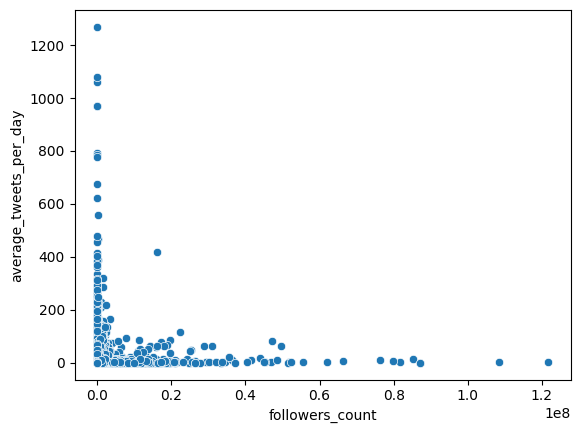

In [17]:
import seaborn as sns
sns.scatterplot(data=df,x='followers_count',y='average_tweets_per_day')

<Axes: xlabel='followers_count', ylabel='friends_count'>

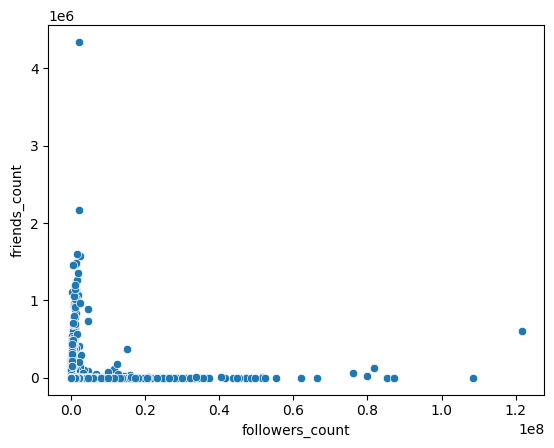

In [18]:
import seaborn as sns
sns.scatterplot(data=df,x='followers_count',y='friends_count')

<Axes: xlabel='followers_count', ylabel='favourites_count'>

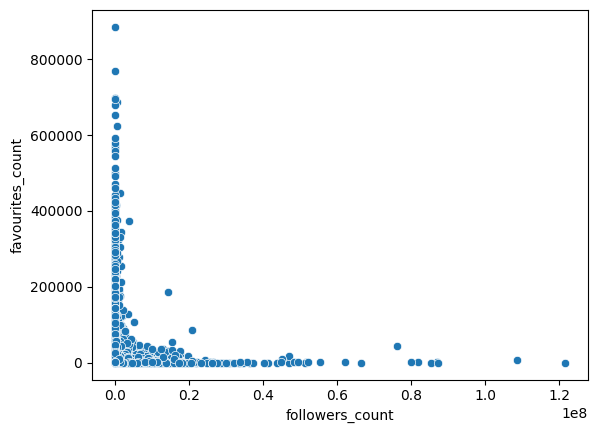

In [19]:
import seaborn as sns
sns.scatterplot(data=df,x='followers_count',y='favourites_count')

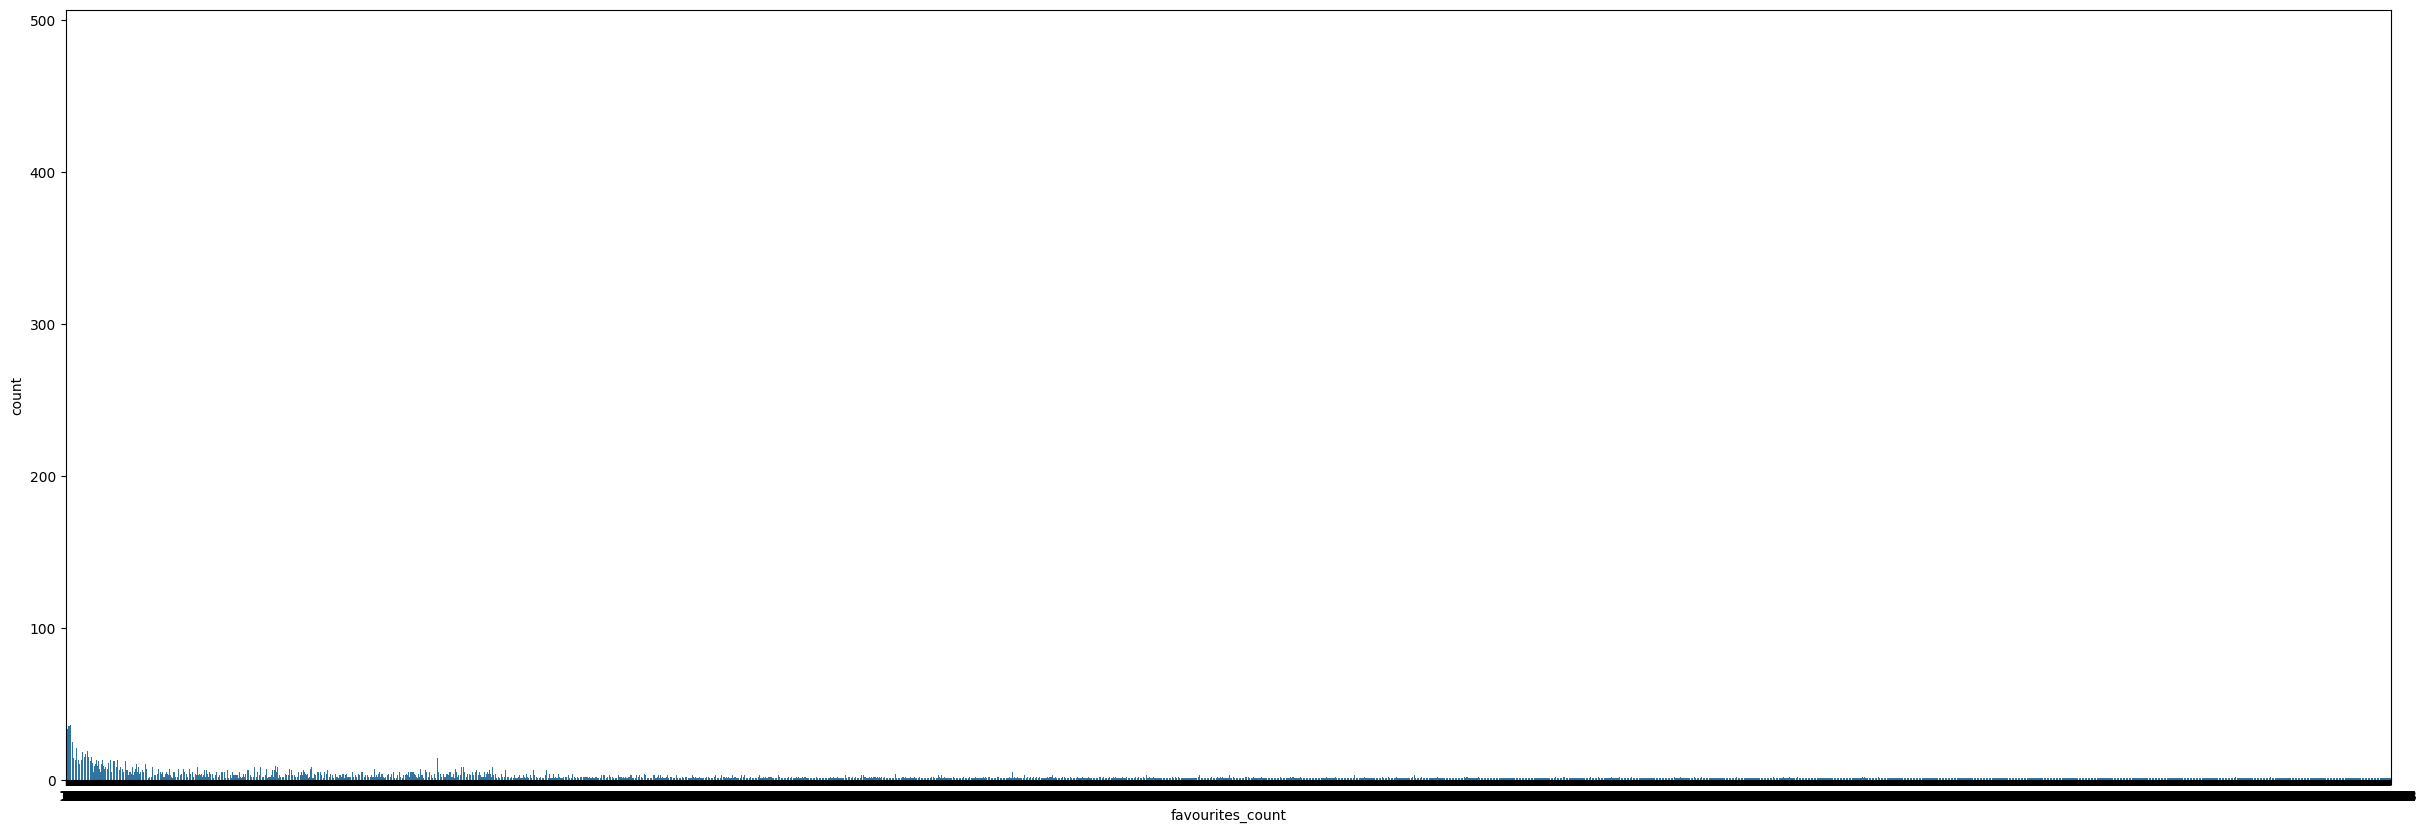

In [20]:
plt.figure(figsize=(30, 10))
sns.countplot(data=df, x="favourites_count", )
plt.show()

In [21]:
y = df['account_type'].astype(int)
scaler = MinMaxScaler(feature_range = (0,1))
x = scaler.fit_transform(X)

x = x.reshape(x.shape[0], 1, x.shape[1])

X_train, X_test, y_train , y_test = train_test_split(x , y, test_size=0.3 , random_state = 1)
print ('X_train: ', X_train.shape)
print ('X_test: ', X_test.shape)
print ('y_train: ', y_train.shape)
print ('y_test: ', y_test.shape)

model = models.Sequential()

model.add(LSTM(50,input_shape=(X_train.shape[1], X_train.shape[2]),activation='relu', return_sequences =True))
model.add(LSTM(256,input_shape=(X_train.shape[1], X_train.shape[2]),activation='relu', return_sequences =True))
model.add(LSTM(64,input_shape=(X_train.shape[1], X_train.shape[2]),activation='relu', return_sequences =True))


model.add(Dense(64, kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Dropout(0.2))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer="RMSProp", loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=32, epochs=100,validation_data=(X_test,y_test) )

X_train:  (18122, 1, 11)
X_test:  (7767, 1, 11)
y_train:  (18122,)
y_test:  (7767,)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
567/567 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.7441 - loss: 0.5957 - val_accuracy: 0.7610 - val_loss: 0.4802
Epoch 2/100
567/567 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.7590 - loss: 0.4869 - val_accuracy: 0.7694 - val_loss: 0.4732
Epoch 3/100
567/567 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.7661 - loss: 0.4818 - val_accuracy: 0.7762 - val_loss: 0.4755
Epoch 4/100
567/567 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.7619 - loss: 0.4805 - val_accuracy: 0.7770 - val_loss: 0.4727
Epoch 5/100
567/567 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.7612 - loss: 0.4855 - val_accuracy: 0.7675 - val_loss: 0.4683
Epoch 6/100
567/567 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.7593 - loss: 0.4878 - val_accuracy: 0.7793 - val_loss: 0.4707
Epoch 7/100
567/567 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7644 - loss: 0.4771 - val_accuracy: 0.7786 - val_loss: 0.4635
Epoch 8/100
567/567 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.7647 - loss: 0.480

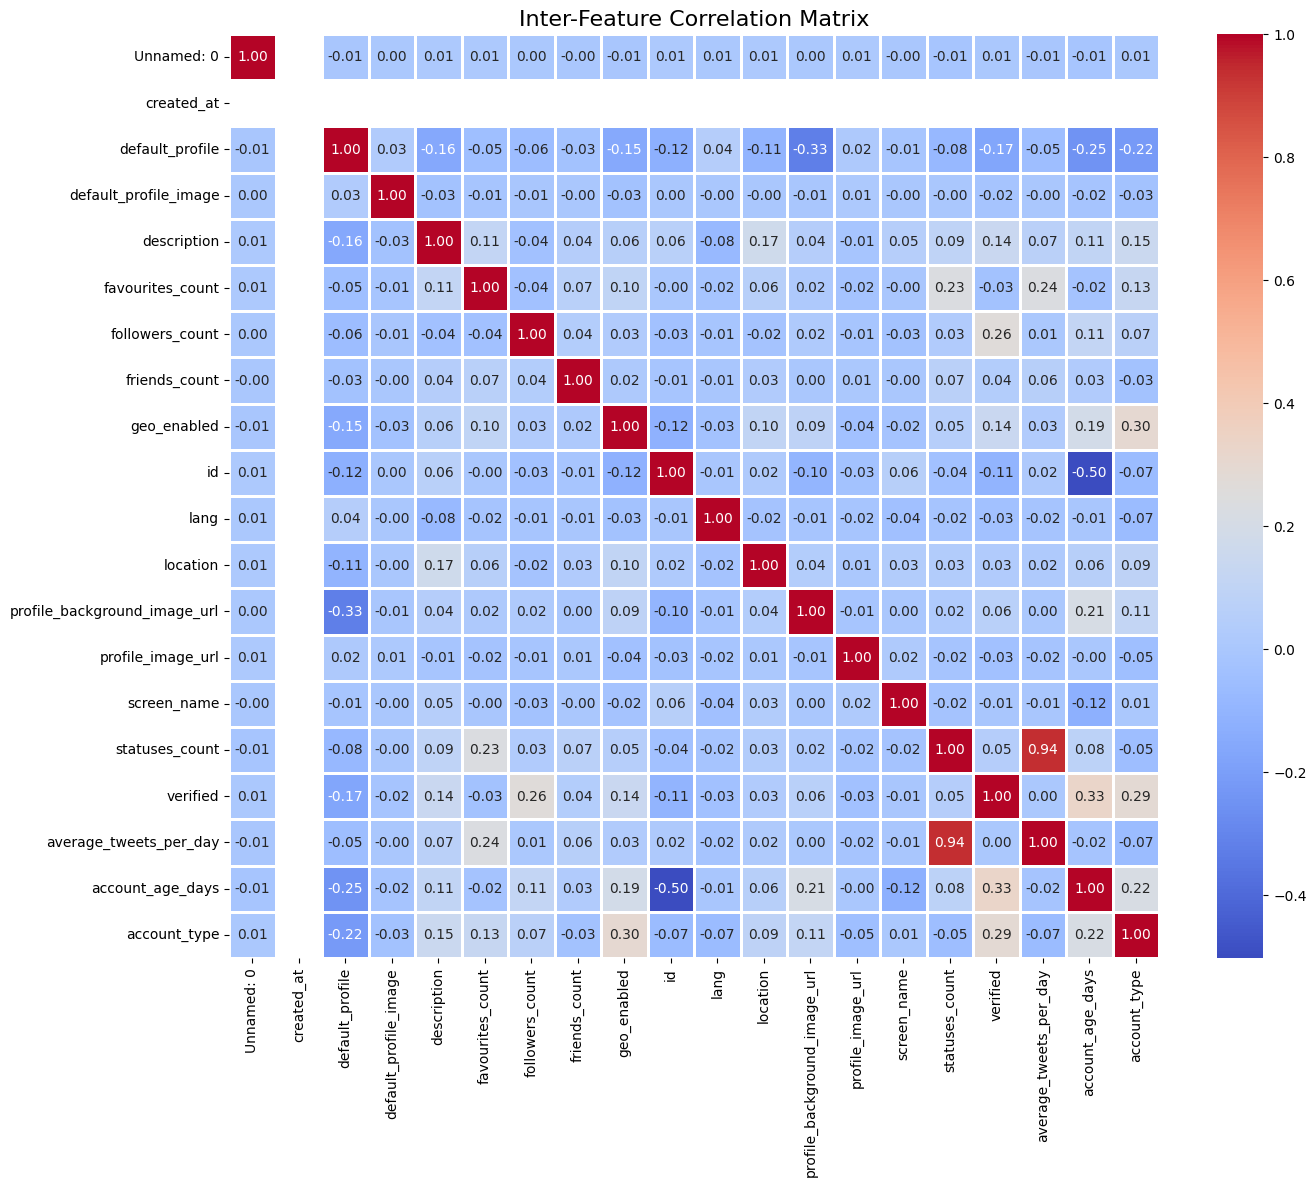

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Adjust the figure size for larger blocks
plt.figure(figsize=(15, 12))  # Increase width and height to make blocks bigger

# Create the heatmap with additional adjustments
sns.heatmap(
    df2.corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    # mask=np.triu(df2.corr()),
    linewidths=1  # Add spacing between cells for better visibility
)

# Add title and display the plot
plt.title("Inter-Feature Correlation Matrix", fontsize=16)
plt.show()

In [23]:
# Calculate Pearson correlations with target
correlations = X.corrwith(y).sort_values(ascending=False)

# Display top correlations
print("Top Features Correlated with Account Type:")
print(correlations.head(10))


Top Features Correlated with Account Type:
verified                 0.286631
account_age_days         0.215610
description_length       0.145328
follower_friend_ratio    0.012042
screen_name_length       0.006919
has_default_image       -0.028280
tweet_frequency         -0.062511
friend_follower_ratio   -0.136147
screen_name_digits      -0.151473
has_default_profile     -0.219833
dtype: float64


/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


<ipython-input-24-306e70bbf1f1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.index, y=correlations.values, palette="viridis")


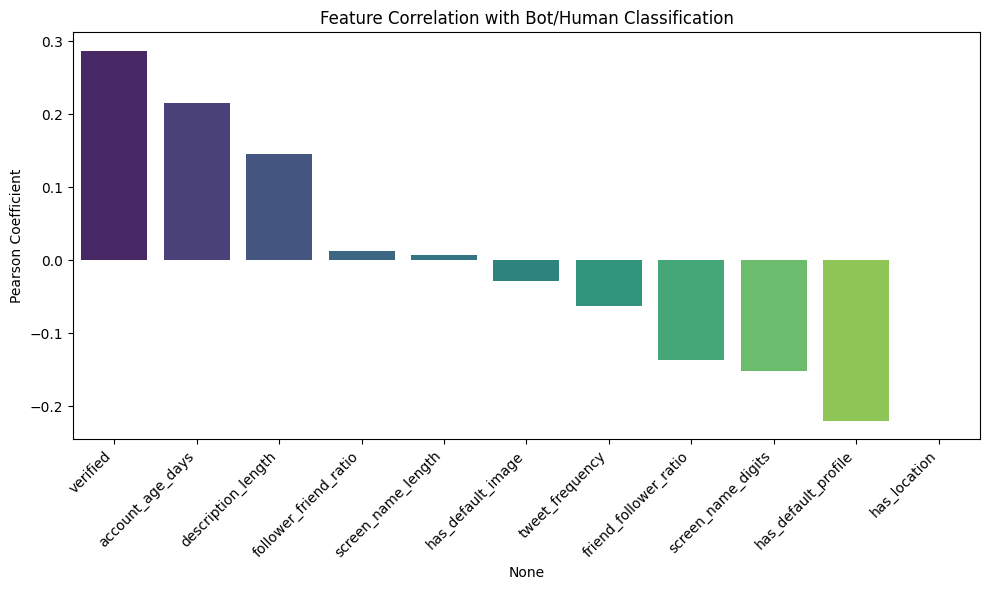

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.index, y=correlations.values, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.title("Feature Correlation with Bot/Human Classification")
plt.ylabel("Pearson Coefficient")
plt.tight_layout()
plt.show()

In [25]:
# Select features with |correlation| > threshold
threshold = 0.10  # Adjust based on your data
selected_features = correlations[abs(correlations) > threshold].index.tolist()

# Update feature set
X = df[selected_features]
print(f"Selected features: {selected_features}")

Selected features: ['verified', 'account_age_days', 'description_length', 'friend_follower_ratio', 'screen_name_digits', 'has_default_profile']


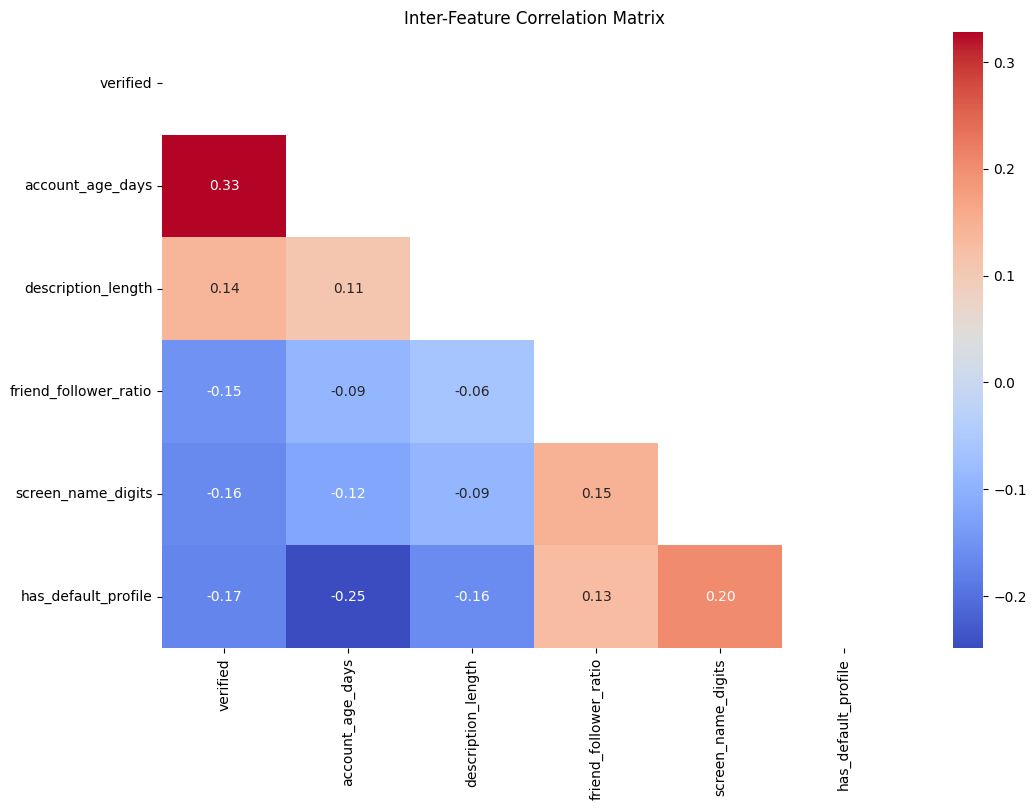

Highly correlated feature pairs:
 Empty DataFrame
Columns: [level_0, level_1, 0]
Index: []


In [26]:
# Feature-feature correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(X.corr(), annot=True, fmt=".2f", cmap="coolwarm", mask=np.triu(X.corr()))
plt.title("Inter-Feature Correlation Matrix")
plt.show()

# Remove highly correlated pairs (e.g., |r| > 0.8)
high_corr_pairs = X.corr().abs().stack().reset_index()
high_corr_pairs = high_corr_pairs[
    (high_corr_pairs[0] > 0.8) &
    (high_corr_pairs['level_0'] != high_corr_pairs['level_1'])
]
print("Highly correlated feature pairs:\n", high_corr_pairs)

In [27]:
# After feature selection:
scaler = MinMaxScaler(feature_range=(0,1))
x = scaler.fit_transform(X)  # Now uses selected features

# Reshape for LSTM (adjust shape based on selected features)
x = x.reshape(x.shape[0], 1, x.shape[1])

In [28]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Initialize and train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=1)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate model performance
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_report = classification_report(y_test, y_pred_xgb)

print("XGBoost Accuracy:", xgb_accuracy)
print("XGBoost Classification Report:\n", xgb_report)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:42:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.8263164671044161
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.47      0.57      1856
           1       0.85      0.94      0.89      5911

    accuracy                           0.83      7767
   macro avg       0.78      0.71      0.73      7767
weighted avg       0.81      0.83      0.81      7767



In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Initialize and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=1)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate model performance
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf)

print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:\n", rf_report)

Random Forest Accuracy: 0.8215527230590962
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.47      0.56      1856
           1       0.85      0.93      0.89      5911

    accuracy                           0.82      7767
   macro avg       0.77      0.70      0.72      7767
weighted avg       0.81      0.82      0.81      7767

